# Week 2 Task — Student Performance Data Analysis

**Author:** Akash Verma

**Objective:** Apply NumPy and Pandas to perform data analysis on a student performance dataset.  
This notebook includes dataset creation, loading, exploration, summary statistics, NumPy calculations, searching a student by name, finding top 3 students, and adding a Pass/Fail column.

**Files included**
- `student_performance_sample.csv` — sample dataset (20 rows)
- `week2-task-Akash-Verma.ipynb` — this notebook
- `README.md` — instructions and how to run



In [1]:
# Imports and load dataset
import pandas as pd
import numpy as np

csv_path = 'student_performance_sample.csv'  # if running locally, ensure this CSV is in the same folder
df = pd.read_csv(csv_path)
df.head()

,StudentID,Name,Gender,Math,Science,English,StudyHours,Average
0,101,Aarav Sharma,M,46,81,29,2.3,52.00
1,102,Ishaan Patel,F,77,70,68,3.6,71.67
2,103,Neha Singh,M,26,74,56,3.4,52.00
3,104,Sana Khan,M,54,83,99,5.8,78.67
4,105,Rohit Verma,M,62,22,57,5.1,47.00


In [2]:
# Display first 5 rows and basic info
print('First 5 rows:')
display(df.head())

print('\nDataFrame info:')
df.info()

print('\nDataFrame shape:', df.shape)

First 5 rows:


,StudentID,Name,Gender,Math,Science,English,StudyHours,Average
0,101,Aarav Sharma,M,46,81,29,2.3,52.00
1,102,Ishaan Patel,F,77,70,68,3.6,71.67
2,103,Neha Singh,M,26,74,56,3.4,52.00
3,104,Sana Khan,M,54,83,99,5.8,78.67
4,105,Rohit Verma,M,62,22,57,5.1,47.00



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   20 non-null     int64  
 1   Name        20 non-null     object 
 2   Gender      20 non-null     object 
 3   Math        20 non-null     int64  
 4   Science     20 non-null     int64  
 5   English     20 non-null     int64  
 6   StudyHours  20 non-null     float64
 7   Average     20 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ KB

DataFrame shape: (20, 8)


In [3]:
# Summary statistics for numeric columns
numeric_cols = ['Math','Science','English','StudyHours','Average']
summary = pd.DataFrame({
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'max': df[numeric_cols].max(),
    'min': df[numeric_cols].min()
})
summary

,mean,median,max,min
Math,64.0500,68.500,88.00,26.00
Science,57.0500,66.500,92.00,21.00
English,57.7500,61.000,99.00,23.00
StudyHours,3.0950,3.100,5.80,0.60
Average,59.6175,53.835,82.67,46.33


In [4]:
# NumPy calculations: overall subject-wise average and standard deviation of averages
import numpy as np

# Flatten subject scores into a single array to compute overall average score across all subject entries
all_scores = df[['Math','Science','English']].to_numpy().flatten()
overall_average_all_scores = np.mean(all_scores).round(2)
std_dev_averages = np.std(df['Average'].to_numpy()).round(2)

print(f'Overall average across all subject scores: {overall_average_all_scores}')
print(f'Standard deviation of student averages: {std_dev_averages}')

Overall average across all subject scores: 59.62
Standard deviation of student averages: 11.74


In [5]:
# Function: search student by name (case-insensitive partial match)
def search_student(name_query, df=df):
    name_query = name_query.strip().lower()
    mask = df['Name'].str.lower().str.contains(name_query)
    results = df[mask]
    if results.empty:
        print(f'No student found matching: "{name_query}"')
    else:
        display(results)

# Example usage:
print('Example search for "rahul":')
search_student('rahul')

Example search for "rahul":


,StudentID,Name,Gender,Math,Science,English,StudyHours,Average
10,111,Rahul Kumar,M,82,37,25,2.0,48.0


In [6]:
# Top 3 students based on Average score
top3 = df.sort_values('Average', ascending=False).head(3)
print('Top 3 students based on Average score:')
display(top3[['StudentID','Name','Gender','Math','Science','English','Average']])

Top 3 students based on Average score:


,StudentID,Name,Gender,Math,Science,English,Average
17,118,Riya Bhattacharya,F,86,79,83,82.67
3,104,Sana Khan,M,54,83,99,78.67
12,113,Siddharth Roy,M,73,79,84,78.67


In [7]:
# Create Pass/Fail column: Pass if Average >= 40 else Fail
threshold = 40
df['Result'] = np.where(df['Average'] >= threshold, 'Pass', 'Fail')
print(f'Pass/Fail threshold: {threshold}')
display(df[['StudentID','Name','Average','Result']].head(10))

# Save updated CSV
df.to_csv('student_performance_with_results.csv', index=False)
print('\nSaved updated file as student_performance_with_results.csv')

Pass/Fail threshold: 40


,StudentID,Name,Average,Result
0,101,Aarav Sharma,52.00,Pass
1,102,Ishaan Patel,71.67,Pass
2,103,Neha Singh,52.00,Pass
3,104,Sana Khan,78.67,Pass
4,105,Rohit Verma,47.00,Pass
5,106,Kavya Rao,55.67,Pass
6,107,Aditya Joshi,46.33,Pass
7,108,Maya Nair,49.00,Pass
8,109,Vikram Desai,54.67,Pass
9,110,Ananya Gupta,63.33,Pass



Saved updated file as student_performance_with_results.csv


In [10]:
# Simple console menu for interactive use
def menu(df):
    while True:
        print('\n===== Student Performance Menu =====')
        print('1. View dataset summary (first 5 rows + basic stats)')
        print('2. Search student by name')
        print('3. Show top 3 students by average')
        print('4. Show pass/fail counts')
        print('5. Exit')
        choice = input('Enter option number: ').strip()
        if choice == '1':
            display(df.head())
            print('\nSummary statistics:')
            display(df.describe(include='all'))
        elif choice == '2':
            q = input('Enter student name to search (partial allowed): ')
            search_student(q, df)
        elif choice == '3':
            display(df.sort_values('Average', ascending=False).head(3))
        elif choice == '4':
            counts = df['Result'].value_counts()
            print('Pass/Fail counts:')
            print(counts.to_string())
        elif choice == '5':
            print('Exiting menu. Bye!')
            break
        else:
            print('Invalid option — please enter 1-5.')

# To run the menu, uncomment the next line and execute the cell:
# menu(df)

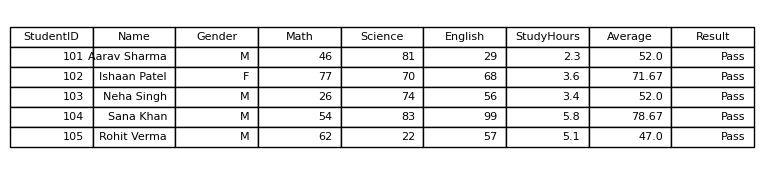

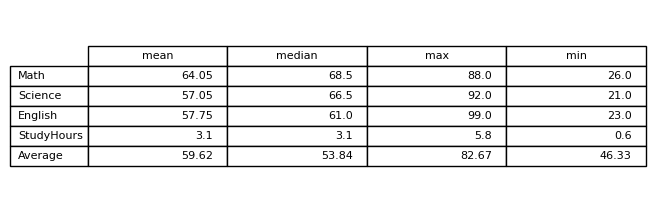

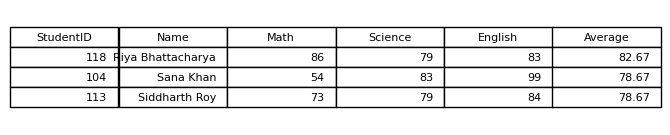

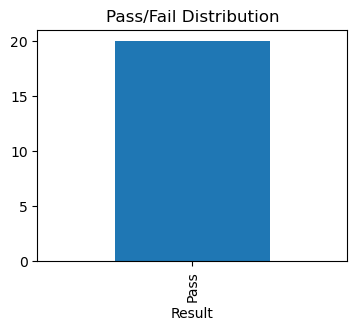

In [9]:
import matplotlib.pyplot as plt

# 1. First 5 rows of dataset (table screenshot)
fig, ax = plt.subplots(figsize=(8,2))
ax.axis('off')
tbl = ax.table(cellText=df.head().values, colLabels=df.columns, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1.2, 1.2)
plt.savefig("output_first5rows.png", bbox_inches="tight")
plt.show()

# 2. Summary statistics (mean, median, max, min)
numeric_cols = ['Math','Science','English','StudyHours','Average']
summary = pd.DataFrame({
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'max': df[numeric_cols].max(),
    'min': df[numeric_cols].min()
})

fig, ax = plt.subplots(figsize=(6,2.5))
ax.axis('off')
tbl = ax.table(cellText=summary.round(2).values,
               colLabels=summary.columns,
               rowLabels=summary.index,
               loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1.2, 1.2)
plt.savefig("output_summary.png", bbox_inches="tight")
plt.show()

# 3. Top 3 students by average
top3 = df.sort_values('Average', ascending=False).head(3)
fig, ax = plt.subplots(figsize=(7,1.5))
ax.axis('off')
tbl = ax.table(cellText=top3[['StudentID','Name','Math','Science','English','Average']].values,
               colLabels=['StudentID','Name','Math','Science','English','Average'],
               loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1.2, 1.2)
plt.savefig("output_top3.png", bbox_inches="tight")
plt.show()

# 4. Pass/Fail distribution bar chart
fig, ax = plt.subplots(figsize=(4,3))
df['Result'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Pass/Fail Distribution")
plt.savefig("output_passfail.png", bbox_inches="tight")
plt.show()
